## 인프런 2020년 새해 다짐 이벤트 댓글 분석
- https://www.inflearn.com/pages/newyear-event-20200102
- 영상 튜토리얼 : https://www.youtube.com/watch?v=OUSwQk79H8I&list=PLaTc2c6yEwmohRzCxWQqJ7Z9aqc-sQ5gC

## 기획자나 마케터가 되어 이벤트 댓글을 분석해 보자!¶

### 내가 만약 수백 수천개의 댓글을 다 읽어봐야 한다면?

### 댓글 속에 제품에 대한 관심을 빈도수로 추출해야 한다면?
- 쇼핑몰에서 제품 관련 이벤트 진행시 어떤 제품을 고객이 선호하는지 알고 싶다면?
- 고객 DB와 연계할 수 있다면 이벤트 혹은 마케팅 세그먼트로 활용해 볼 수도 있지 않을까?

## 향후 마케팅이나 전략을 어떻게 세워야 할까?

In [5]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

%matplotlib inline
# 시각화 결과가 선명하게 표시되도록
%config InlineBackend.figure_format = 'retina'

In [6]:
plt.rc("font",family="Malgun Gothic")
plt.rc('axes', unicode_minus=False)
# 한글 폰트 설정방법

## 크롤링한 파일 로드하기

In [17]:
# df 라는 변수에 이벤트 댓글 파일을 로드합니다.
df= pd.read_csv("event댓글.csv")
df.shape

(2446, 1)

In [10]:
# head 로 미리보기 합니다.
df.head()

,text
0,2020년 목표: 프알못에서 프로젝트 마스터 되기 \n관심 있는 강의 : 스프링 ...
1,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
2,"2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는..."
3,2020년 목표 : 리액트 공부하기
4,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급


In [11]:
# tail 로 미리보기 합니다.
df.tail()

,text
2441,"작년 한해도 일이 바쁘다, 야근해서 힘들다는 핑계로 김영한님의 JPA 강의를 또 스..."
2442,저는 졸업을 1년 남기고 있는 컴퓨터공학과 학생입니다. 졸업 프로젝트로 웹/앱 개발...
2443,"에프터 이펙트를 써본 적은 있는데, 매번 기초만 배우다 말았어요. 이걸 할 줄 안다..."
2444,저번에 인프런에서 페이스북 마케팅 강의를 듣고 많은 도움을 받았습니다. 마케팅 업무...
2445,인프런 0호 팀원이에요!\n그동안 서비스 개발 때문에 js 를 많이 했었는데 앞으론...


## 데이터 전처리

### 네트워크 오류 등으로 발생한 중복 입력 값을 제거
- 빈도 수 중복을 방지하기 위해

In [18]:
print(df.shape)
df= df.drop_duplicates(["text"], keep="last") # text가 중복이 되는것 제거하는데 keep="last" 가장 최근것을 남기겠다.
print(df.shape)

(2446, 1)
(2408, 1)


### 원본은 따로 보존

In [21]:
# 전처리 전에 원본을 보존하기 위해 복사해 둠.
df["origin_text"] = df["text"]
df.head()

,text,origin_text
0,2020년 목표: 프알못에서 프로젝트 마스터 되기 \n관심 있는 강의 : 스프링 ...,2020년 목표: 프알못에서 프로젝트 마스터 되기 \n관심 있는 강의 : 스프링 ...
1,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
2,"2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는...","2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는..."
4,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급
5,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!


### 소문자 변환

- 파이썬은 대소문자를 구분하기 때문에 데이터 필터링을 위해 대문자를 모두 소문자로 변경


In [22]:
# "text" 파이썬은 대소문자를 구분하기 때문에 데이터 필터링을 위해 대문자를 모두 소문자로 변경
df["text"] = df["text"].str.lower()

In [25]:
# 같은 의미의 단어를 하나로 통일 예 python => 파이썬 
# 영어를 한글로 해서 데이터 빠짐없이
# replace 는 텍스트가 완전히 일치될 때만 사용할 수 있습니다.
# 일부만 일치한다면 str.replace 를 사용하면 원하는 텍스트로 변경이 가능합니다.
df["text"] = df["text"].str.replace(
    "python","파이썬").str.replace(
    "pandas","판다스").str.replace(
    "javascript","자바스크립트").str.replace(
    "java","자바").str.replace(
    "react","리액트")

### 텍스트로 관심 강의 분리

In [29]:
# 이벤트에 관심강의를 남겼는데 관심강의 관심 강의 등으로 표현이 되있음. 관심강의로 텍스트 분리 관심강의 뒤에 있는 텍스트를 가져옵니다.
# 대부분 "관심강의"라는 텍스트를 쓰고 뒤에 강의명을 쓰기 때문입니다.
# 전처리한 내용은 실수를 방지하기 위해 "course" 라는 새로운 컬럼에 담습니다.
# "관심 강의", "관심 강좌" 에 대해서도 똑같이 전처리 합니다.
# ":" 특수문자를 빈문자로 바꿔줍니다.
df["course"] = df["text"].apply(lambda x : x.split("관심강의")[-1]) # 인뎅싱 할때 마지막껏 만 가져옴
df["course"] = df["course"].apply(lambda x : x.split("관심 강의")[-1])
df["course"] = df["course"].apply(lambda x : x.split("관심 강좌")[-1])
df["course"] = df["course"].str.replace(":","") # :를 공백으로
# "text", "course" 전처리 내용 미리보기
df["course"].head()

0    2020년  목표 프알못에서 프로젝트 마스터 되기 \n관심 있는 강의  스프링 , 리액트
1    2020년 목표 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 강...
2    2020년 목표 c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는 ...
4                  40대 프로그래밍 시작!  우리를 위한 프로그래밍  파이썬 중급
5                       2020년 목표  돌머리 비전공자가 멋진 전공자 되기!
Name: course, dtype: object

In [30]:
df[["text","course"]].tail()
# 관심강의 text가 없을경우 전체를 가져오게 전처리를 함.

,text,course
2441,"작년 한해도 일이 바쁘다, 야근해서 힘들다는 핑계로 김영한님의 jpa 강의를 또 스...",스프링 데이터 jpa
2442,저는 졸업을 1년 남기고 있는 컴퓨터공학과 학생입니다. 졸업 프로젝트로 웹/앱 개발...,스프링 부트 개념과 활용
2443,"에프터 이펙트를 써본 적은 있는데, 매번 기초만 배우다 말았어요. 이걸 할 줄 안다...",에펙 초보자도 만들 수 있는 유튜브 인트로 에프터이펙트 강좌
2444,저번에 인프런에서 페이스북 마케팅 강의를 듣고 많은 도움을 받았습니다. 마케팅 업무...,파이썬 입문 및 웹 크롤링을 활용한 다양한 자동화 어플리케이션 제작하기
2445,인프런 0호 팀원이에요!\n그동안 서비스 개발 때문에 js 를 많이 했었는데 앞으론...,남박사의 파이썬 활용


## 띄어쓰기를 제거한 텍스트에서 키워드 추출
- TIOBE 프로그래밍 언어 순위 : https://www.tiobe.com/tiobe-index/?fbclid=IwAR34dJfgDHq2DK0C6X3g8IsUno2NhOiikMyxT6fw9SoyujFhy5FPvQogMoA

In [31]:
# 특정 키워드가 들어가는 댓글을 찾습니다.
search_keyword = ['머신러닝','딥러닝','파이썬','판다스','공공데이터',
                  'djando','크롤링','시각화','데이터분석','웹개발','엑셀','c',
                  '자바','자바스크립트','node','vue','리액트']

for keyword in search_keyword:
    df[keyword]= df["course"].str.contains(keyword)
    # 키워드가 text에 들어간다면 True로 아니면 False로 새로운 컬럼 생성

In [34]:
# 파이썬|공공데이터|판다스 라는 텍스트가 들어가는 데이터가 있는지 찾습니다.
df_python = df[df["text"].str.contains("파이썬|공공데이터|판다스")].copy()
df_python.head()

,text,origin_text,course,머신러닝,딥러닝,파이썬,판다스,공공데이터,djando,크롤링,시각화,데이터분석,웹개발,엑셀,c,자바,자바스크립트,node,vue,리액트
4,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! 우리를 위한 프로그래밍 파이썬 중급,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19,파이썬 데이터시각화 분석 실전 프로젝트 수강하고 싶어요,파이썬 데이터시각화 분석 실전 프로젝트 수강하고 싶어요,파이썬 데이터시각화 분석 실전 프로젝트 수강하고 싶어요,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
22,머신러닝 제대로 배워보고 싶습니다.\n#관심강의 : 파이썬 머신러닝 완벽가이드,머신러닝 제대로 배워보고 싶습니다.\n#관심강의 : 파이썬 머신러닝 완벽가이드,파이썬 머신러닝 완벽가이드,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
26,"#관심강의: 프로그래밍 시작하기 : 파이썬 입문, 공공데이터로 파이썬 데이터 분석 ...","#관심강의: 프로그래밍 시작하기 : 파이썬 입문, 공공데이터로 파이썬 데이터 분석 ...","프로그래밍 시작하기 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기\n파...",False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
30,자바기반 웹 개발자입니다. 데이터 분석에 많이 쓰이는 파이썬이 궁금합니다.\n#관심...,자바기반 웹 개발자입니다. 데이터 분석에 많이 쓰이는 Python이 궁금합니다.\n...,"프로그래밍 시작하기 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기",False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [38]:
# 이걸 통해서 빈도수를 알수 있음.
True + True + False # 이런 식으로 숫자로 나옴

2

In [41]:
# 결과를 모두 더하면 해당 키워드의 등장 빈도수를 카운트 할 수 있습니다.
# search_keyword 컬럼만 가져와서 빈도수를 sum으로 더합니다.
df[search_keyword].sum().sort_values(ascending=False)

c         409
파이썬       406
자바        341
자바스크립트    140
리액트       138
머신러닝      133
vue       132
node      117
크롤링        56
딥러닝        53
시각화        30
웹개발        27
데이터분석      24
엑셀         18
공공데이터      12
판다스         6
djando      0
dtype: int64

In [33]:
# 공공데이터 텍스트가 들어가는 문장만 찾습니다.
# pandas 를 통해 볼때 문장이 길면 끝까지 보이지 않습니다.
# 문장의 전체를 보기 위해 for문을 통해 해당 텍스트를 순회하며 출력합니다.
# 이 때, 데이터 사이에 ------ 줄로 구분해서 표시하도록 합니다.
text= df.loc[(df["공공데이터"]==True),"text"]
for t in text:
    print("-" *20)
    print(t)

--------------------
#관심강의: 프로그래밍 시작하기 : 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기
파이썬의 고수가 되고싶어요
--------------------
자바기반 웹 개발자입니다. 데이터 분석에 많이 쓰이는 파이썬이 궁금합니다.
#관심강의: 프로그래밍 시작하기 : 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기
--------------------
올해 안에 원하는 공부 다 끝내보려고요. 내년이면 수능이라..

#관심강의: 공공데이터로 파이썬 데이터 분석 시작하기
--------------------
it개발자입니다. 개발을 오래 안하고 관리만 했더니 다시 개발이 너무 하고싶습니다. 올해는 인프런을 통해서 개발쪽 스킬셋을 업그레이드 하고 싶습니다!
#관심강의: 공공데이터로 파이썬 데이터 분석 시작하기
--------------------
파이썬 데이터분석 마스터
#관심강의:공공데이터로 파이썬 데이터 분석 시작하기
--------------------
올해 졸업하는 컴퓨터공학과 학생입니다!
백엔드 혹은 데이터 엔지니어 쪽으로 취업하고 싶습니다!
#관심강의: 공공데이터로 파이썬 데이터 분석 시작하기
--------------------
텍스트 마이닝만 수강한 뒤 현재 맡은 마케팅 업무 능률이 엄청나게 올라가는 것을 확인했으며 승진과 고가에 엄청나게 득을 보았습니다 감사합니다! 앞으로도 인프런 애용하겠습니다.
추가적으로 해 박조은 강사님의 [공공데이터로 파이썬 데이터 분석 시작하기] 강의를 듣고 상권분석과 공공데이터 활용 역량을 올릴 예정입니다. 화이팅!!!
#관심강의 : 공공데이터로 파이썬 데이터 분석 시작하기
--------------------
데이터분석 2년차가 되는데 작년에 파이썬 강의를 담아놓고 그대로 1년간 방치... 올해는 꼭 완강하고 실습해서 개발자에게 의존하지 않고 혼자 크롤링&분석 해내고 싶어요! 
#관심강의: 공공데이터로 파이썬 데이터분석 시작하기, database 1&2 - mysql
------

### 판다스 단어가 들어가는 텍스트만 찾기
- 이미 str.contains를 통해 판다스가 들어가는 텍스트에 대해 컬럼을 만들어 놨습니다.
- 이 값이 True라면 판다스 강좌입니다.

In [42]:
df.loc[(df["판다스"]==True),"text"]

541     2020년에는 데이터분석 관련한 실력을 쌓고싶습니다!\n#관심강의 : 파이썬, 판다...
690     취미로 안드로이드 개발하는 사람입니다. 자바로 작성하다 보니, kotlin이 안드로...
757          판다스 라입러리에 관심이 많아서 배워보려 합니다 #관심강의 : 박조은 - 판다스
1235      2020년!! 올 해는 빅데이터 분석 전문가 되기!!\n#관심강의 : 파이썬, 판다스
2152    2020년 목표  파이썬 을  활용해  데이터 분석 작업을 진행하고 싶습니다.  관...
2362    저는 백세시대에 조금 더 오랫동안 it일을 하기위해서 it전략기획에서 데이터분석가로...
Name: text, dtype: object

## 빈도수 계산을 위한 텍스트 데이터 벡터화
- BOW 단어 가방에 단어를 토큰화 해서 담아줌

In [44]:
# "파이썬 데이터 분석" 이라는 텍스트를 토큰화 split 을 통해 해봅니다.
"파이썬 데이터 분석".split()

['파이썬', '데이터', '분석']

In [48]:
# 사이킷런의 CountVectorizer 를 통해 벡터화 합니다.
# vectorizer 라는 변수에 CountVectorizer 를 담습니다.
from sklearn.feature_extraction.text import CountVectorizer # 파이썬의 대표적 머신러닝

vectorizer = CountVectorizer(analyzer = 'word', # 캐릭터 단위로 벡터화 할 수도 있습니다. 
                             tokenizer = None, # 기본적으로 띄어쓰기고 다른 토크나이저를 따로 지정해 줄 수도 있습니다. 
                             preprocessor = None, # 전처리 도구 
                             stop_words = None, # 불용어 nltk등의 도구를 사용할 수도 있습니다. 
                             min_df = 2, # 토큰이 나타날 최소 문서 개수로 오타나 자주 나오지 않은 특수한 전문용어 제거에 좋습니다. 
                             ngram_range=(3,6), # 강의명들은 3개이상이 많기 때문에 BOW의 단위 갯수의 범위를 지정합니다. 
                             max_features = 3000 # 만들 피처의 수, 단어의수
                            )
vectorizer

CountVectorizer(max_features=3000, min_df=2, ngram_range=(3, 6))

In [50]:
# df['course'] 만 벡터화 합니다.
feature_vector = vectorizer.fit_transform(df['course'])
feature_vector.shape
# 관심강의 뒤에 따로 분리해놓은 텍스트를 집어 넣음

(2408, 2335)

In [51]:
# vectorizer 에서 get_feature_names 를 추출합니다.
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]
# 숫자가 맨 앞에 들어가서 순차정렬로 보여줌.
# 단어가 3개부터 6개까지 묶여져 있음.

2335


['12개 만들면서 배우는',
 '12개 만들면서 배우는 ios',
 '12개 만들면서 배우는 ios 아이폰',
 '12개 만들면서 배우는 ios 아이폰 개발',
 '12개를 만들며 배우는',
 '12개를 만들며 배우는 swift4',
 '12개를 만들며 배우는 swift4 ios11',
 '12개를 만들며 배우는 swift4 ios11 아이폰',
 '2018 do it',
 '2018 do it 안드로이드']

In [52]:
# 각 리뷰마다 등장하는 단어에 빈도수가 표현됩니다. 0 은 등장하지 않음을 의미합니다.
pd.DataFrame(feature_vector[:10].toarray(), columns=vocab).head()

,12개 만들면서 배우는,12개 만들면서 배우는 ios,12개 만들면서 배우는 ios 아이폰,12개 만들면서 배우는 ios 아이폰 개발,12개를 만들며 배우는,12개를 만들며 배우는 swift4,12개를 만들며 배우는 swift4 ios11,12개를 만들며 배우는 swift4 ios11 아이폰,2018 do it,2018 do it 안드로이드,...,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기,활용한 데이터분석과 it보안,활용한 리액트 native,활용한 리액트 native 개발,활용한 메신져 만들기,활용한 메신져 만들기 android,활용한 파이썬 프로그래밍,활용한 파이썬 프로그래밍 완벽,활용한 파이썬 프로그래밍 완벽 이해
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# 위에서 구한 단어벡터를 더하면 단어가 전체에서 등장하는 횟수를 알수 있음.
# 벡터화 된 피처를 확인해 봄
# bag of words에 몇 개의 단어가 들어있는지 확인
dist = np.sum(feature_vector, axis=0)

df_freq = pd.DataFrame(dist,columns=vocab)
df_freq
# 2408의 행에서 2335열의 단어가 몇번씩 등장하는지.?
# 12개를 만들면서 배우는 ios 아이폰 다 같은 강좌 중복이있음.
# why? 단어 벡터를 묶어줬기 때문에.

,12개 만들면서 배우는,12개 만들면서 배우는 ios,12개 만들면서 배우는 ios 아이폰,12개 만들면서 배우는 ios 아이폰 개발,12개를 만들며 배우는,12개를 만들며 배우는 swift4,12개를 만들며 배우는 swift4 ios11,12개를 만들며 배우는 swift4 ios11 아이폰,2018 do it,2018 do it 안드로이드,...,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기,활용한 데이터분석과 it보안,활용한 리액트 native,활용한 리액트 native 개발,활용한 메신져 만들기,활용한 메신져 만들기 android,활용한 파이썬 프로그래밍,활용한 파이썬 프로그래밍 완벽,활용한 파이썬 프로그래밍 완벽 이해
0,2,2,2,2,2,2,2,2,2,2,...,13,12,2,8,8,2,2,2,2,2


In [55]:
# 행과 열을 축을 T로 바꿔주고 빈도수로 정렬
df_freq.T.sort_values(by=0,ascending=False).head(100)
# 가장 많이 언급된 강의 상위 100개
# 실제로는 불용어가 중요하지 않음. 불용어가 자주 등장하다보니 그 단어가 중요하다고 판단 될수도 있음.
# 그래서 이런 중요하지 않은 단어들은 가중치를 낮추고 중요한단어는 가중치를 높인다.

,0
홍정모의 따라하며 배우는,100
스프링 데이터 jpa,60
nodebird sns 만들기,60
리액트로 nodebird sns 만들기,49
리액트로 nodebird sns,49
...,...
누구든지 하는 리액트,20
하는 리액트 초심자를 위한 리액트,20
하는 리액트 초심자를 위한,20
하는 리액트 초심자를,20


In [56]:
# 강의에는 없고 github에만 있는 추가내용
# ["course", "freq"] 라는 컬럼명을 주어 위에서 만든 데이터프레임을 변환합니다.
df_freq_T = df_freq.T.reset_index()
df_freq_T.columns = ["course","freq"]
df_freq_T.head()

,course,freq
0,12개 만들면서 배우는,2
1,12개 만들면서 배우는 ios,2
2,12개 만들면서 배우는 ios 아이폰,2
3,12개 만들면서 배우는 ios 아이폰 개발,2
4,12개를 만들며 배우는,2


In [57]:
# 강의명을 토큰 3개로 중복제거하기 위해, 강좌명에서 지식공유자의 이름을 빈문자열로 변경합니다.
# 강의명을 lambda 식을 사용해서 x.split() 으로 나누고 [:4] 앞에서 4개까지만 텍스트를 가져오고 다시 join으로 합쳐줍니다. 
# 중복된 텍스트를 구분해서 보기 위함입니다.
df_freq_T["course_find"] = df_freq_T["course"].str.replace("홍정모의","")
df_freq_T["course_find"] = df_freq_T["course_find"].apply(lambda x : "".join(x.split()[:4]))
df_freq_T.sort_values(["course_find","freq"],ascending=False).head(10)

,course,freq,course_find
2333,활용한 파이썬 프로그래밍 완벽,2,활용한파이썬프로그래밍완벽
2334,활용한 파이썬 프로그래밍 완벽 이해,2,활용한파이썬프로그래밍완벽
2332,활용한 파이썬 프로그래밍,2,활용한파이썬프로그래밍
2331,활용한 메신져 만들기 android,2,활용한메신져만들기android
2330,활용한 메신져 만들기,2,활용한메신져만들기
2329,활용한 리액트 native 개발,8,활용한리액트native개발
2328,활용한 리액트 native,8,활용한리액트native
2327,활용한 데이터분석과 it보안,2,활용한데이터분석과it보안
2325,활용한 다양한 자동화 어플리케이션,13,활용한다양한자동화어플리케이션
2326,활용한 다양한 자동화 어플리케이션 제작하기,12,활용한다양한자동화어플리케이션


In [58]:
# 3개의 ngram과 빈도수로 역순 정렬을 하게 되면 빈도수가 높고, ngram수가 많은 순으로 정렬이 됨 
# 여기에서 drop_duplicates로 첫 번째 강좌를 남기고 나머지 중복을 삭제 합니다.
print(df_freq_T.shape)
df_course = df_freq_T.drop_duplicates(["course_find", "freq"], keep="first")
print(df_course.shape)

(2335, 3)
(1670, 3)


In [60]:
# 빈도수로 정렬을 하고 어떤 강좌가 댓글에서 가장 많이 언급되었는지 봅니다.
df_course = df_course.sort_values(by="freq", ascending=False)
df_course.head(20)

,course,freq,course_find
2298,홍정모의 따라하며 배우는,100,따라하며배우는
324,nodebird sns 만들기,60,nodebirdsns만들기
1311,스프링 데이터 jpa,60,스프링데이터jpa
998,리액트로 nodebird sns,49,리액트로nodebirdsns
1053,머신러닝 완벽 가이드,49,머신러닝완벽가이드
999,리액트로 nodebird sns 만들기,49,리액트로nodebirdsns만들기
2070,파이썬 머신러닝 완벽,49,파이썬머신러닝완벽
2071,파이썬 머신러닝 완벽 가이드,48,파이썬머신러닝완벽가이드
2201,프로그래밍과 자바스크립트 es6,48,프로그래밍과자바스크립트es6
2250,함수형 프로그래밍과 자바스크립트,47,함수형프로그래밍과자바스크립트


In [61]:
# 전처리가 다 되었다면 다른 팀 또는 담당자에게 전달하기 위해  csv 형태로 저장합니다.
df_course.to_csv("event-course-name-freq.csv")

## TF-IDF 로 가중치를 주어 벡터화
### TfidfTransformer()
- norm='l2' 각 문서의 피처 벡터를 어떻게 벡터 정규화 할지 정합니다.
   - L2 : 벡터의 각 원소의 제곱의 합이 1이 되도록 만드는 것이고 기본 값(유클리디안거리)
   - L1 : 벡터의 각 원소의 절댓값의 합이 1이 되도록 크기를 조절(맨하탄거리)
- smooth_idf=False
   - 피처를 만들 때 0으로 나오는 항목에 대해 작은 값을 더해서(스무딩을 해서) 피처를 만들지 아니면 그냥 생성할지를 결정
- sublinear_tf=False
- use_idf=True
   - TF-IDF를 사용해 피처를 만들 것인지 아니면 단어 빈도 자체를 사용할 것인지 여부


In [64]:
# TfidfTransformer 를 불러와서 가중치를 주어 벡터화 합니다.
# transformer 라는 변수로 저장하고 재사용합니다.
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
transformer

TfidfTransformer(smooth_idf=False)

In [66]:
# 시간이 오래걸려서 시간처리
# fit_transform 으로 가중치를 적용하고 결과를 feature_tfidf 로 받습니다.
%%time
feature_tfidf = transformer.fit_transform(feature_vector)
feature_tfidf.shape

Wall time: 2 ms


(2408, 2335)

In [67]:
# 가중치를 주어서 다시 벡터를 구하게함.
feature_tfidf

<2408x2335 sparse matrix of type '<class 'numpy.float64'>'
	with 12220 stored elements in Compressed Sparse Row format>

In [68]:
# 각 row에서 전체 단어가방에 있는 어휘에서 등장하는 단어에 대한 one-hot-vector에 TF-IDF 가중치 반영한 결과를 봅니다.
# feature_tfidf.toarray() 로 배열로 만들고  데이터 프레임을 만들어 tfidf_freq 라는 변수에 할당해서 봅니다.
tfidf_freq = pd.DataFrame(feature_tfidf.toarray(),columns=vocab)
tfidf_freq.head()

,12개 만들면서 배우는,12개 만들면서 배우는 ios,12개 만들면서 배우는 ios 아이폰,12개 만들면서 배우는 ios 아이폰 개발,12개를 만들며 배우는,12개를 만들며 배우는 swift4,12개를 만들며 배우는 swift4 ios11,12개를 만들며 배우는 swift4 ios11 아이폰,2018 do it,2018 do it 안드로이드,...,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기,활용한 데이터분석과 it보안,활용한 리액트 native,활용한 리액트 native 개발,활용한 메신져 만들기,활용한 메신져 만들기 android,활용한 파이썬 프로그래밍,활용한 파이썬 프로그래밍 완벽,활용한 파이썬 프로그래밍 완벽 이해
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
# tfidf_freq를 sum 으로 가중치를 다 더해줍니다.
df_tfidf = pd.DataFrame(tfidf_freq.sum())
df_tfidf_top = df_tfidf.sort_values(by=0,ascending=False)
df_tfidf_top.head(20)

,0
홍정모의 따라하며 배우는,66.358336
스프링 데이터 jpa,35.430937
nodebird sns 만들기,26.771259
리액트로 nodebird sns,24.148755
리액트로 nodebird sns 만들기,24.148755
파이썬 머신러닝 완벽,24.054167
머신러닝 완벽 가이드,23.806450
파이썬 머신러닝 완벽 가이드,23.151284
프로그래밍과 자바스크립트 es6,19.183502
함수형 프로그래밍과 자바스크립트,18.267068


In [71]:
# 중간에 생략되는 단어를 자세히 보고자 할 때
for t in df_tfidf_top.index[:50]:
    print(t)

홍정모의 따라하며 배우는
스프링 데이터 jpa
nodebird sns 만들기
리액트로 nodebird sns
리액트로 nodebird sns 만들기
파이썬 머신러닝 완벽
머신러닝 완벽 가이드
파이썬 머신러닝 완벽 가이드
프로그래밍과 자바스크립트 es6
함수형 프로그래밍과 자바스크립트
함수형 프로그래밍과 자바스크립트 es6
부트 개념과 활용
스프링 부트 개념과
스프링 부트 개념과 활용
실전 스프링 데이터
실전 스프링 데이터 jpa
2020년 공부 목표
홍정모의 따라하며 배우는 c언어
따라하며 배우는 c언어
남박사의 파이썬 실전
실전 100 활용
파이썬 실전 100
남박사의 파이썬 실전 100
남박사의 파이썬 실전 100 활용
파이썬 실전 100 활용
파이썬 머신러닝 완벽가이드
관심있는 인프런 강의명
rest api 개발
대세는 쿠버네티스 기초편
스프링부트 개념과 활용
orm 표준 jpa 프로그래밍
표준 jpa 프로그래밍
orm 표준 jpa
기반 rest api 개발
스프링 기반 rest api
스프링 기반 rest
스프링 기반 rest api 개발
기반 rest api
자바 orm 표준 jpa 프로그래밍
자바 orm 표준 jpa
자바 orm 표준
js 완벽 가이드
vue js 완벽 가이드
vue js 완벽
애플리케이션을 테스트하는 다양한
자바 애플리케이션을 테스트하는 다양한
자바 애플리케이션을 테스트하는
파이썬 알고리즘 문제풀이
테스트하는 다양한 방법
애플리케이션을 테스트하는 다양한 방법


# 군집화
- 실루엣 분석추가 https://www.kaggle.com/fabiendaniel/customer-segmentation
- cluster - MiniBatchKMeans

In [72]:
from sklearn.cluster import KMeans
from tqdm import trange
inertia = []

start = 10
end = 50

# 적절한 클러스터의 갯수를 알기 위해 for 문을 이용하여서 inertia 값을 구함
# trange 를 통해 시작과 끝 값을 지정해 주면 진행 정도를 알 수 있습니다.
# 학습을 할 때는 feature_tfidf 값을 사용합니다.
# cls.inertia_ 값을 inertia 리스트에 저장합니다.
for i in trange(start,end):
    cls = KMeans(n_clusters=i, random_state=42) # random_state=42는 유투브 강의랑 같은값이 나오도록 고정
    cls.fit(feature_vector)
    inertia.append(cls.inertia_)

100%|██████████| 40/40 [00:23<00:00,  1.71it/s]


Text(0.5, 1.0, 'KMeans 클러스터수 비교')

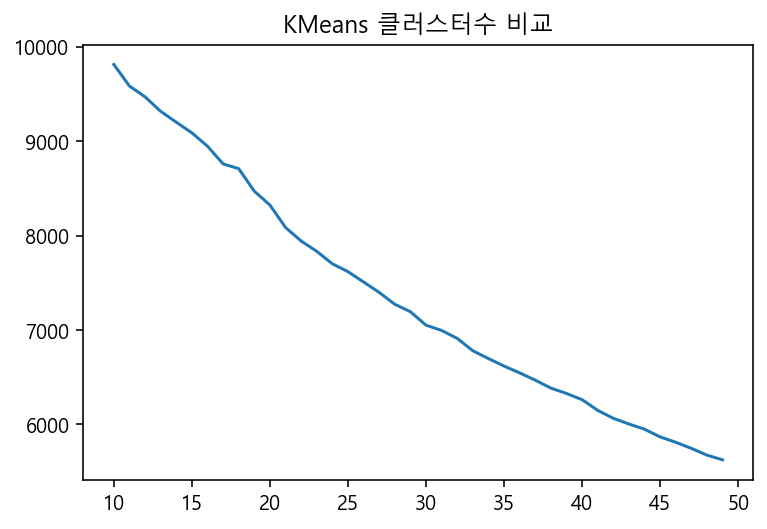

In [73]:
# 위에서 구한 값을 시각화 합니다.
# x축에는 클러스터의 수를 y축에는 inertia 값을 넣어 그립니다.
# 음으로 내려갈 수록 군집화가 잘 되었는데 50개 이상이여야 클러스터링이 잘 될것
plt.plot(range(start,end),inertia)
plt.title("KMeans 클러스터수 비교")

In [74]:
# n_clusters 에 적절한 값을 넣어줍니다.
# fit.predict 를 하고 결과를 cluster 라는 새로운 컬럼에 담습니다.
# 비슷한 것들끼리 묶어주는 과정
n_clusters = 30
cls=KMeans(n_clusters = n_clusters, random_state=42)
cls.fit(feature_vector)
predict = cls.predict(feature_vector)
df["cluster"] = predict

In [75]:
 df["cluster"].value_counts().head(10)
# 같은 군집 30개가 생성

1     1954
29      47
13      43
24      40
11      33
2       30
25      30
21      28
9       26
10      20
Name: cluster, dtype: int64

In [79]:
# batch_size 를 쓸 수 있는 MiniBatchKMeans로 군집화 
# 결과를 bcluster 라는 변수에 저장합니다.
from sklearn.cluster import MiniBatchKMeans
b_inertia = []

# 적절한 클러스터의 갯수를 알기 위해 ineertai 값을 구함.
for i in trange(start,end):
    cls = MiniBatchKMeans(n_clusters=i, random_state=42)
    cls.fit(feature_vector)
    b_inertia.append(cls.inertia_)
    # 속도가 조금 더 빠름

100%|██████████| 40/40 [00:05<00:00,  7.86it/s]


Text(0.5, 1.0, 'MiniBatchKMeans 클러스터 수 비교')

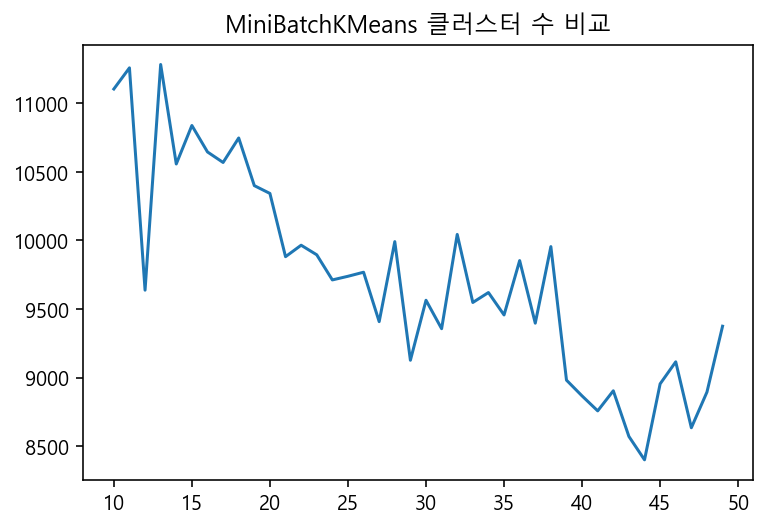

In [80]:
# 위에서 구한 값을 시각화 합니다.
# x축에는 클러스터의 수를 y축에는 b_inertia 값을 넣어 그립니다.
plt.plot(range(start,end),b_inertia)
plt.title("MiniBatchKMeans 클러스터 수 비교")

In [82]:
# MiniBatchKMeans 를 통해 학습을 시킵니다.
# 결과를 bcluster 라는 변수에 저장합니다.
cls = MiniBatchKMeans(n_clusters = n_clusters, random_state=42)
cls.fit(feature_vector)
predict = cls.predict(feature_vector)
df["bcluster"] = predict

In [83]:
# bcluster의 빈도수를 구합니다.
df["bcluster"].value_counts()

20    1330
0      525
1       59
12      50
21      48
10      45
26      41
11      41
8       34
29      34
22      29
27      26
3       22
16      21
17      19
4       18
15      10
19      10
18       8
25       8
9        7
2        6
23       4
28       3
7        3
6        2
13       2
5        2
14       1
Name: bcluster, dtype: int64

In [90]:
df.loc[df["bcluster"]==25,["bcluster","cluster","course"]]
# 특정 컬럼을 설정하여서 군집화가 잘되었는지 확인하고 kmeans 하고 mini하고 차이를 보기위해서 표현.
# 우리는 단어끼리 묶어주었지만 머신러닝은 비지도학습으로 자기가 묶어줌.

,bcluster,cluster,course
577,25,5,실습 ui 개발로 배워보는 순수 자바스크립트 와 vuejs 개발
666,25,5,실습 ui 개발로 배워보는 순수 자바스크립트 와 vuejs 개발
1056,25,5,"리액트로 nodebird sns 만들기, 리액트로 구현하는 블록체인 이더리움 d..."
1239,25,5,"4년째 일에 밀리고, 비프로그램형 뇌에 좌절하고, 잠에 밀린 자바스크립트, 올해 다..."
1653,25,5,"실습 ui 개발로 배워보는 순수 자바스크립트 와 vuejs 개발, 파이썬입문과 크..."
2340,25,5,실습 ui 개발로 배워보는 순수 자바스크립트 와 vuejs 개발
2345,25,5,실습 ui 개발로 배워보는 순수 자바스크립트 와 vuejs 개발
2427,25,5,실습 ui 개발로 배워보는 순수 자바스크립트 와 vuejs 개발


## WordCloud
- amueller/word_cloud: A little word cloud generator in Python
- https://github.com/amueller/word_cloud
- 설치 방법 : Wordcloud :: Anaconda Cloud

In [114]:
from wordcloud import WordCloud

# 불용어 - 자주 등장하지만 의미가 크지 않아 제외하고 싶은 텍스트
stopwords = ["관심 강의", "관심강의", "관심", "강의", "강좌", "강의를",
             "올해", "올해는", "열심히", "공부를", "합니다", "하고", "싶어요", 
              "있는", "있습니다", "싶습니다", "2020년"]
# 불용어를 제거하지 않고 그리려면 아래 주석을 풀어서 stopword 변수에 덮어쓰기를 합니다.
#stopwords = []
# displayWordCloud 라는 함수를 만들어 재사용합니다.
def displayWordCloud(data = None, backgroundcolor = 'white', width=1280, height=768):
    wordcloud = WordCloud(
                        font_path = 'C:/Windows/Fonts/malgun.ttf', 
                        stopwords = stopwords, 
                        background_color = backgroundcolor, 
                        width = width, height = height 
                        ).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

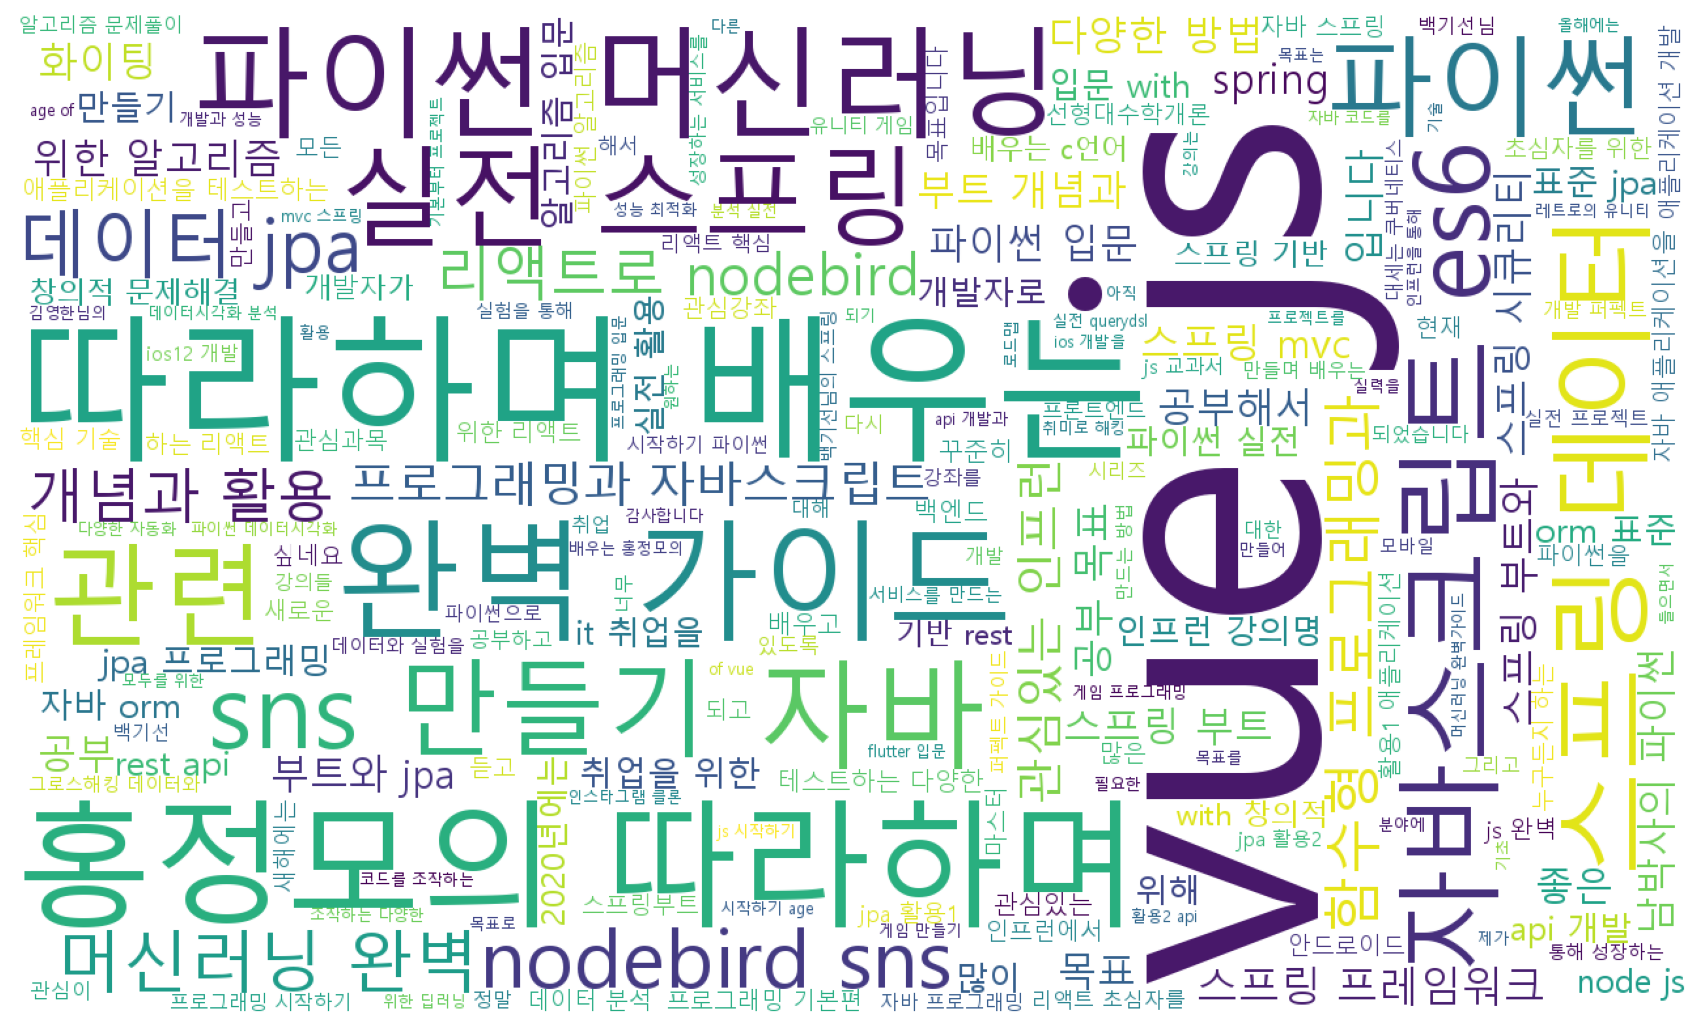

In [115]:
course_text = " ".join(df["course"])
displayWordCloud(course_text)

### 그 외의 유투버 깃허브에 있는 소스코드 공부


In [ ]:
# n_clusters 에 적절한 값을 넣어줍니다.
# fit.predict 를 하고 결과를 cluster 라는 새로운 컬럼에 담습니다.
# n_clusters = 50
# cls = KMeans(n_clusters=n_clusters, random_state=42)
# cls.fit(feature_tfidf)
# prediction = cls.predict(feature_tfidf)
# df["cluster"] = prediction 다음부분 깃허브에만 있음.

In [116]:
# 클러스터 센터
cc = cls.cluster_centers_

In [117]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)

X_tsne = tsne.fit_transform(feature_tfidf)
X_tsne.shape

(2408, 2)

In [118]:
df2d = pd.DataFrame(X_tsne, columns=['x', 'y'])
df2d.shape

(2408, 2)

In [120]:
df2d["cluster"] = predict
df2d.head()

,x,y,cluster
0,-17.361662,5.100821,20
1,-17.361664,5.100821,20
2,17.631014,-7.518626,20
3,10.869908,21.398438,20
4,-8.079643,7.479197,20


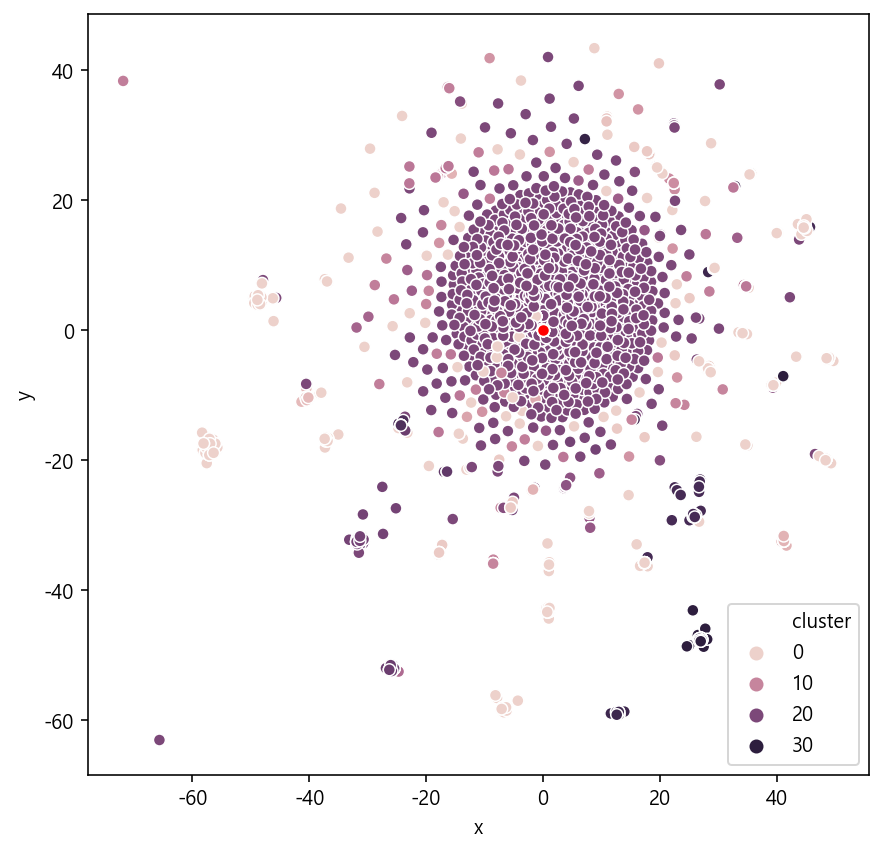

In [121]:
import seaborn as sns
plt.figure(figsize=(7, 7))
sns.scatterplot(data=df2d, x="x", y="y", hue="cluster")
sns.scatterplot(cc[:, 0], cc[:, 1],  color='red')

In [122]:
# df["cluster"] 의 빈도수를 value_counts로 세어봅니다.
df["cluster"].value_counts().head(10)

1     1954
29      47
13      43
24      40
11      33
2       30
25      30
21      28
9       26
10      20
Name: cluster, dtype: int64

## 클러스터 예측 정확도 확인하기

In [125]:
# n_clusters 위에서 정의한 클러스터 수를 사용
feature_array = feature_vector.toarray()
# 예측한 클러스터의 유니크 값
labels = np.unique(predict)
df_cluster_score = []
df_cluster = []
for label in labels:
    id_temp = np.where(predict==label) # 예측한 값이 클러스터 번호와 매치 되는 것을 가져옴
    x_means = np.mean(feature_array[id_temp], axis = 0) # 클러스터의 평균 값을 구함
    sorted_means = np.argsort(x_means)[::-1][:n_clusters] # 값을 역순으로 정렬해서 클러스터 수 만큼 가져옴
    features = vectorizer.get_feature_names()
    best_features = [(features[i], x_means[i]) for i in sorted_means] 
    # 클러스터별 전체 스코어
    df_score = pd.DataFrame(best_features, columns = ['features', 'score'])
    df_cluster_score.append(df_score)
    # 클러스터 대표 키워드
    df_cluster.append(best_features[0])

In [126]:
# 개별 클러스터에서 점수가 가장 높은 단어를 추출 아래 점수가 클수록 예측 정확도가 높음
# MiniBatchKMeans 로 예측한 값 기준
pd.DataFrame(df_cluster, columns = ['features', 'score']).sort_values(by=["features", "score"], ascending=False)

,features,score
23,홍정모의 따라하며 배우는 홍정모의,1.500000
0,홍정모의 따라하며 배우는,0.177143
25,함수형 프로그래밍과 자바스크립트 es6,1.097561
15,프로그래밍 시작하기 파이썬,1.000000
20,파이썬 머신러닝 완벽가이드,0.009023
21,파이썬 머신러닝 완벽,1.000000
6,텍스트 분석과 자연어,1.000000
14,취업을 위한 알고리즘 입문,1.000000
2,차별화된 엑셀 데이터 분석과,1.000000
7,자바스크립트 es6 제대로 알아보기,1.000000


In [127]:
# score 정확도가 1이 나온 클러스터를 찾아봄 - 같은 강좌끼리 묶였는지 확인 함
df.loc[df["bcluster"] == 28, ["bcluster", "cluster", "origin_text", "course"]]

,bcluster,cluster,origin_text,course
390,28,1,"개인적으로 관심이 있어서 자바공부를 조금 했었는데요, 왕초보 블록체인 개념 완벽 이...",왕초보 블록체인 개념 완벽 이해하기(with 자바)
792,28,1,백엔드개발자입니다. 인프런을 통해 레벨업 하고싶습니다.\n관심강의 : 왕초보 블록체...,왕초보 블록체인 개념 완벽 이해하기(with 자바)
2302,28,1,졸업을 앞둔 컴퓨터과학전공 학생입니다. 지난 학기에 휴학을 하고 회사에서 일을 하며...,파이썬기초와 크롤링기초부트캠프(#현재수강중) + 왕초보 블록체인 개념 완벽 이해하...
